# Rainfall Prediction with Linear Regression

- Task: `predict the amount of rainfall`

- Dataset: `Austin Weather in Texas`([link](https://www.kaggle.com/grubenm/austin-weather))

## EDA

Clean the data before applying it to the model


#### Import libraries

In [1]:
import numpy as np
import pandas as pd

#### Data Preprocessing

In [2]:
# read the data
data = pd.read_csv('dataset/austin_weather.csv')

data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# drop the columns that are unnecessary
data = data.drop(['Date', 'Events', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis=1)

In [4]:
# some values have 'T' which denotes trace rainfall we need to replace all occurrences of T with 0 so that we can use the data in our model
data = data.replace('T', 0.0)

In [5]:
# the data also contains '-' which indicates no or NIL. This means that data is not available we need to replace these values as well.
data = data.replace('-', 0.0)

In [6]:
# save the processed data in a csv file
data.to_csv('austin_ready.csv')

# Model Training

We use Scikit-learn's linear regression model for training


#### Import libraries

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [9]:
# read the processed dataset
data = pd.read_csv('austin_ready.csv')

data.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [19]:
# the features or the 'x' values of the data these columns are used to train the model the last column, i.e, precipitation column will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1)

In [20]:
# Label
Y = data['PrecipitationSumInches']

In [21]:
# We reshape it into a 2D vector
Y = Y.values.reshape(-1, 1)

In [34]:
# consider a random day in the dataset we shall plot a graph and observe this day
day_index = 500
days = [i for i in range(Y.size)]

In [35]:
# initialize a linear regression model
clf = LinearRegression()

In [36]:
# train the classifier with our input data
clf.fit(X, Y)

LinearRegression()

In [37]:
# give a sample input to test our model this is a 2-D vector that contains values for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

In [38]:
# print the output
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


The precipitation trend graph: 


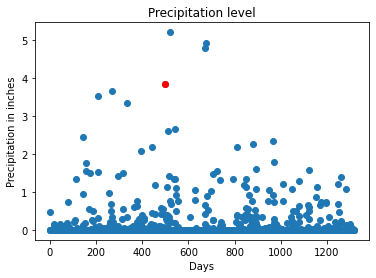

In [39]:
# Now we can plot the graph of the precitpitaion levels with the total number of days
print('The precipitation trend graph: ')
plt.scatter(days, Y)
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()

Precipitation vs selected attributes graph: 


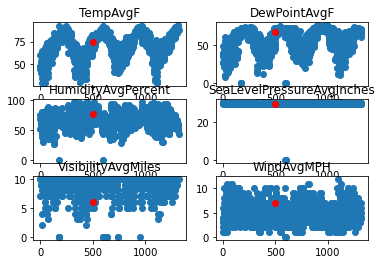

In [42]:
# Let's now see the graphs with some features against the rainfall
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)

print('Precipitation vs selected attributes graph: ')

for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]])
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index],color='r')
    plt.title(x_vis.columns.values[i])
plt.show()

## Final thought:

A day (in red) having precipitation of about 2 inches is tracked across multiple parameters (the same day is tracker across multiple features such as temperature, pressure, etc). The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc. From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.